<a href="https://colab.research.google.com/github/Akshit568/Cat-and-Dog-Image-Classifier/blob/main/cats_vs_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats


100% 1.06G/1.06G [00:04<00:00, 206MB/s]
100% 1.06G/1.06G [00:04<00:00, 261MB/s]


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

# New Section

In [6]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
 )
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
 )


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#Normalize
def process(image,label):
  image= tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:

import keras
from keras.layers import Dropout
# model.add(Dropout(0.1))
from keras.layers import BatchNormalization
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:

history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 106ms/step - loss: 1.2426 - accuracy: 0.5971 - val_loss: 0.6672 - val_accuracy: 0.6348
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5675 - accuracy: 0.7135 - val_loss: 0.5198 - val_accuracy: 0.7460
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4848 - accuracy: 0.7743 - val_loss: 0.4874 - val_accuracy: 0.7750
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4072 - accuracy: 0.8166 - val_loss: 0.4607 - val_accuracy: 0.7826
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3462 - accuracy: 0.8486 - val_loss: 0.5714 - val_accuracy: 0.7350
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2738 - accuracy: 0.8834 - val_loss: 0.8470 - val_accuracy: 0.6630
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1913 - accuracy: 0.9232 - val_loss: 0.4961 - val_ac

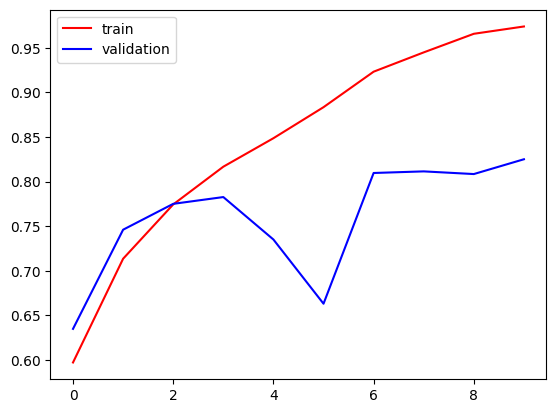

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

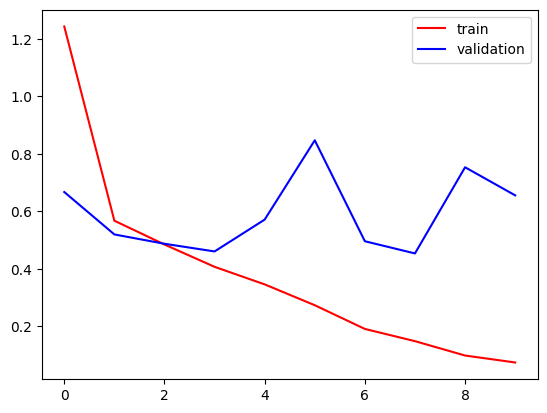

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [17]:
import cv2


In [66]:
test_img = cv2.imread('/content/dog2.jpg')

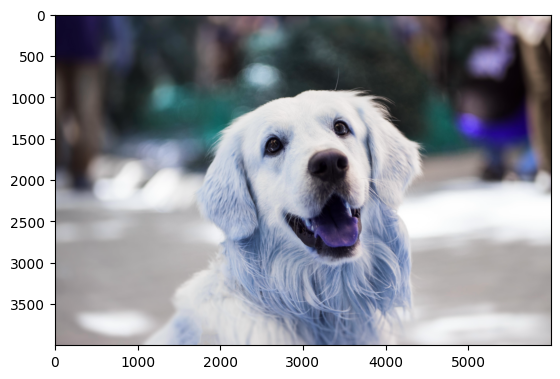

In [67]:
plt.imshow(test_img)

In [68]:
test_img.shape

(4000, 6000, 3)

In [69]:
test_img = cv2.resize(test_img,(256,256))

In [70]:
test_input = test_img.reshape((1,256,256,3))

In [71]:

model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)